In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import csv
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
import scipy.stats as stats
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings

In [2]:
df = pd.read_csv('C:\\Users\\saswa\\OneDrive\\Desktop\\Pinaki-Iris-flower-classification\\datasets\\iris.data1.csv',sep=",",encoding='utf-8')

In [3]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
df["SepalLengthCm"]=df["SepalLengthCm"].round(3)
df["SepalWidthCm"]=df["SepalWidthCm"].round(3)
df["PetalLengthCm"]=df["PetalLengthCm"].round(3)
df["PetalWidthCm"]=df["PetalWidthCm"].round(3)

In [10]:
numerical_data = []
object_data = []

for column in df.columns:
    if df.dtypes[column] != 'object':
        numerical_data.append(column)
    else:
        object_data.append(column)

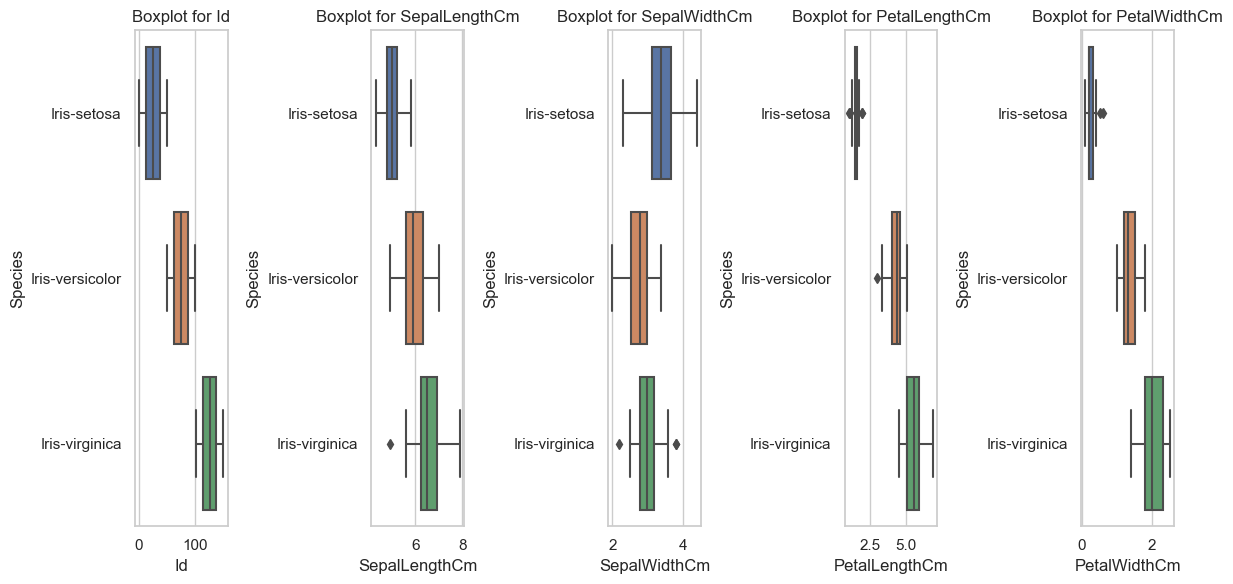

In [11]:
plt.figure(figsize=(12, 6))  
sns.set(style="whitegrid")   

for i in range(len(numerical_data)):
    plt.subplot(1, len(numerical_data), i + 1)  
    sns.boxplot(x=numerical_data[i], y='Species', data=df, orient="h")
    plt.title(f'Boxplot for {numerical_data[i]}')
plt.tight_layout()  
plt.show()

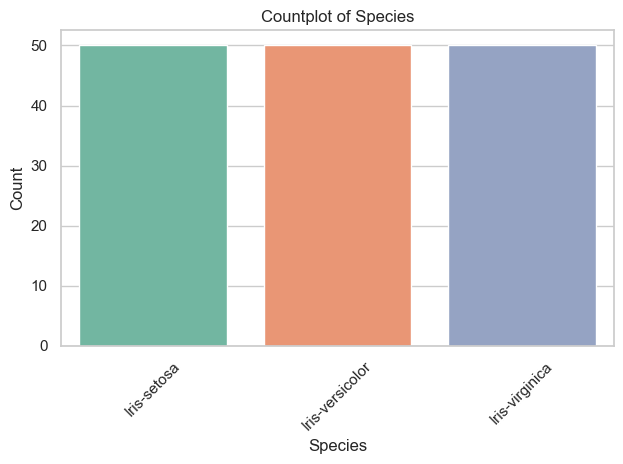

In [12]:
sns.countplot(data=df, x="Species", palette="Set2")  

plt.title("Countplot of Species") 
plt.xlabel("Species")  
plt.ylabel("Count")    

plt.xticks(rotation=45) 
plt.tight_layout()     

plt.show()

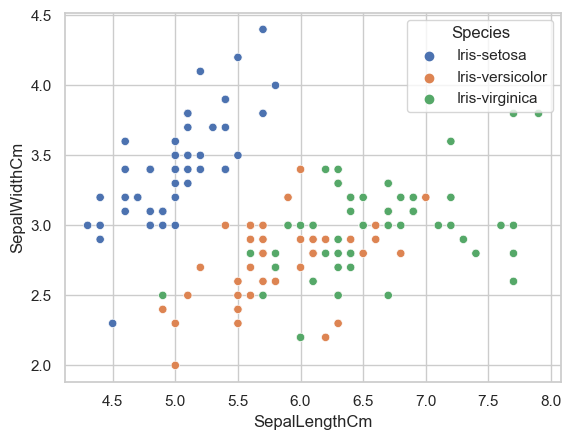

In [13]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=df)
plt.show()

<Axes: xlabel='SepalLengthCm', ylabel='Count'>

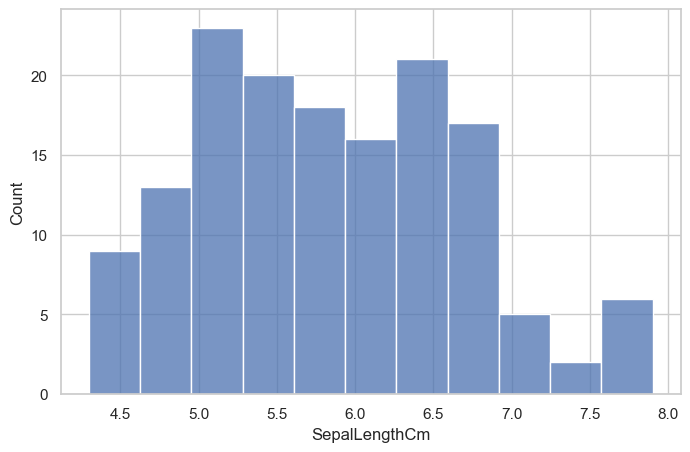

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='SepalLengthCm', bins=11)

<Axes: xlabel='SepalWidthCm', ylabel='Count'>

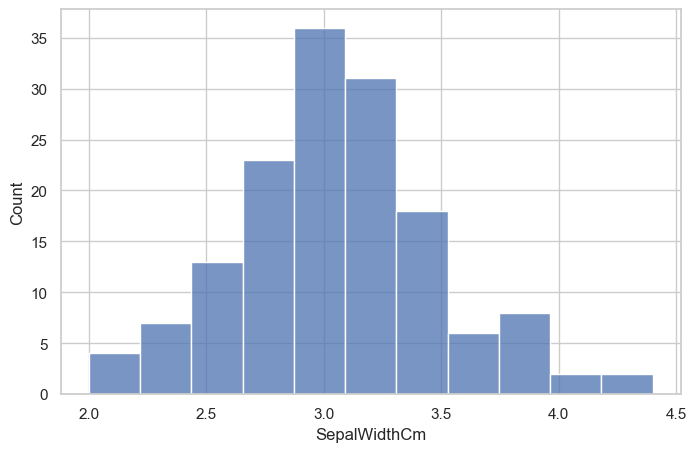

In [15]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='SepalWidthCm', bins=11)

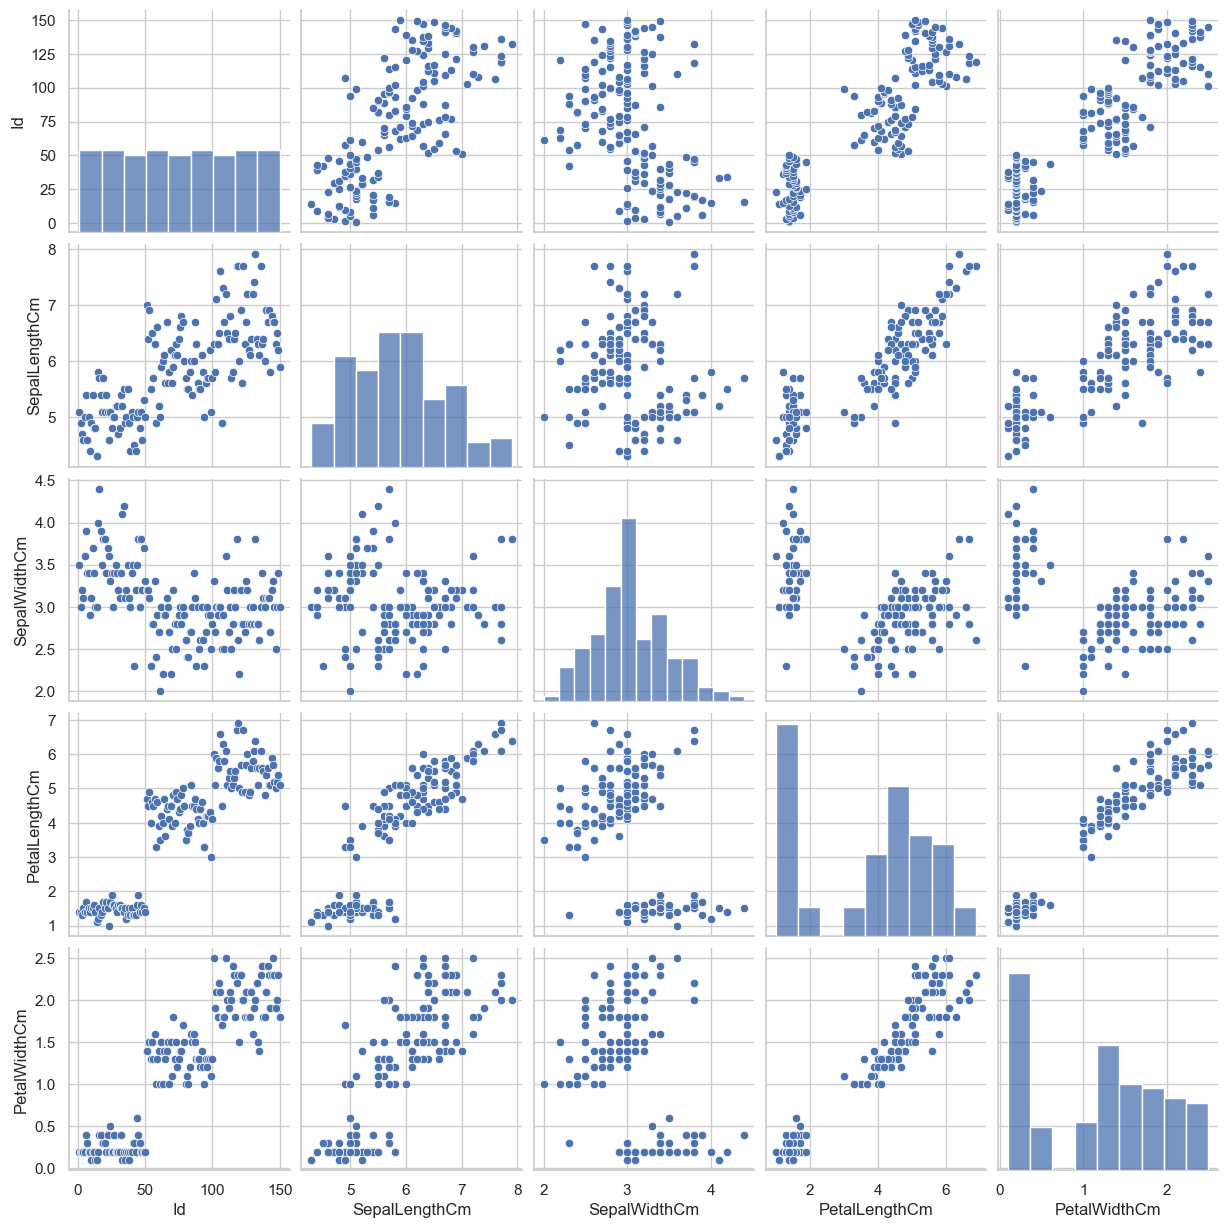

In [16]:
sns.pairplot(df)

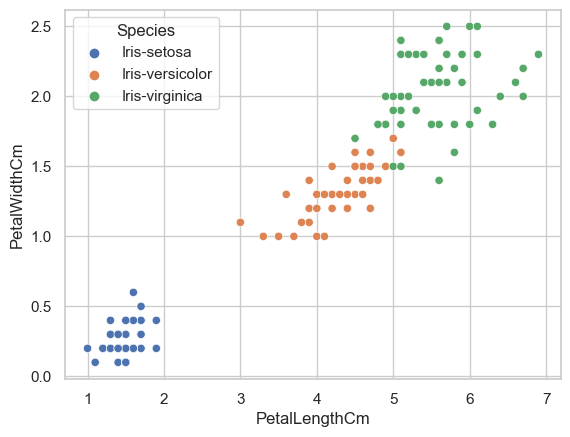

In [17]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=df)
plt.show()

<Axes: xlabel='PetalLengthCm', ylabel='Count'>

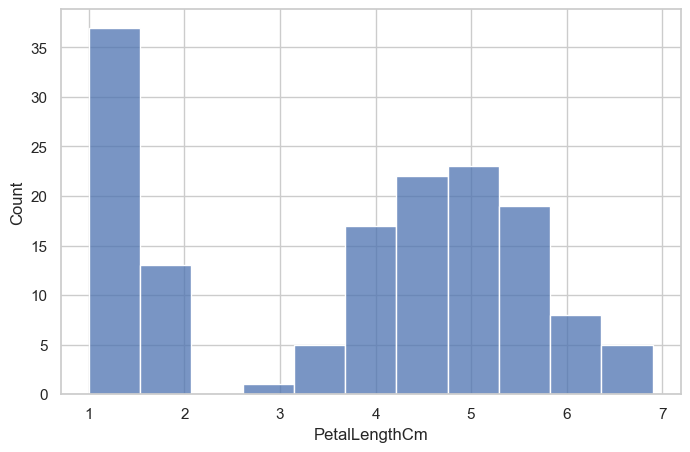

In [18]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='PetalLengthCm', bins=11)

<Axes: xlabel='PetalWidthCm', ylabel='Count'>

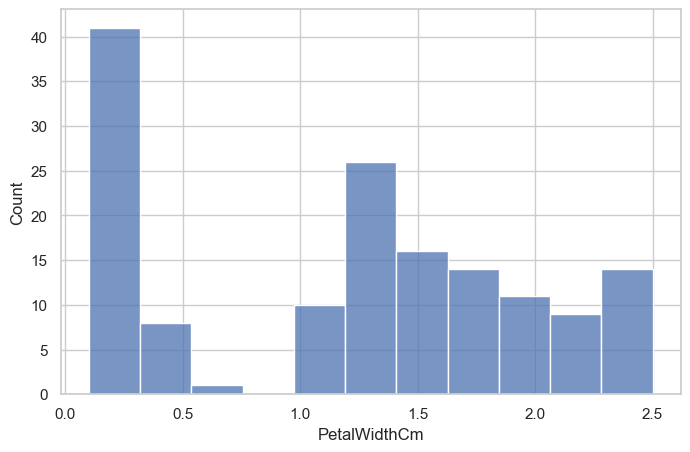

In [19]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='PetalWidthCm', bins=11)

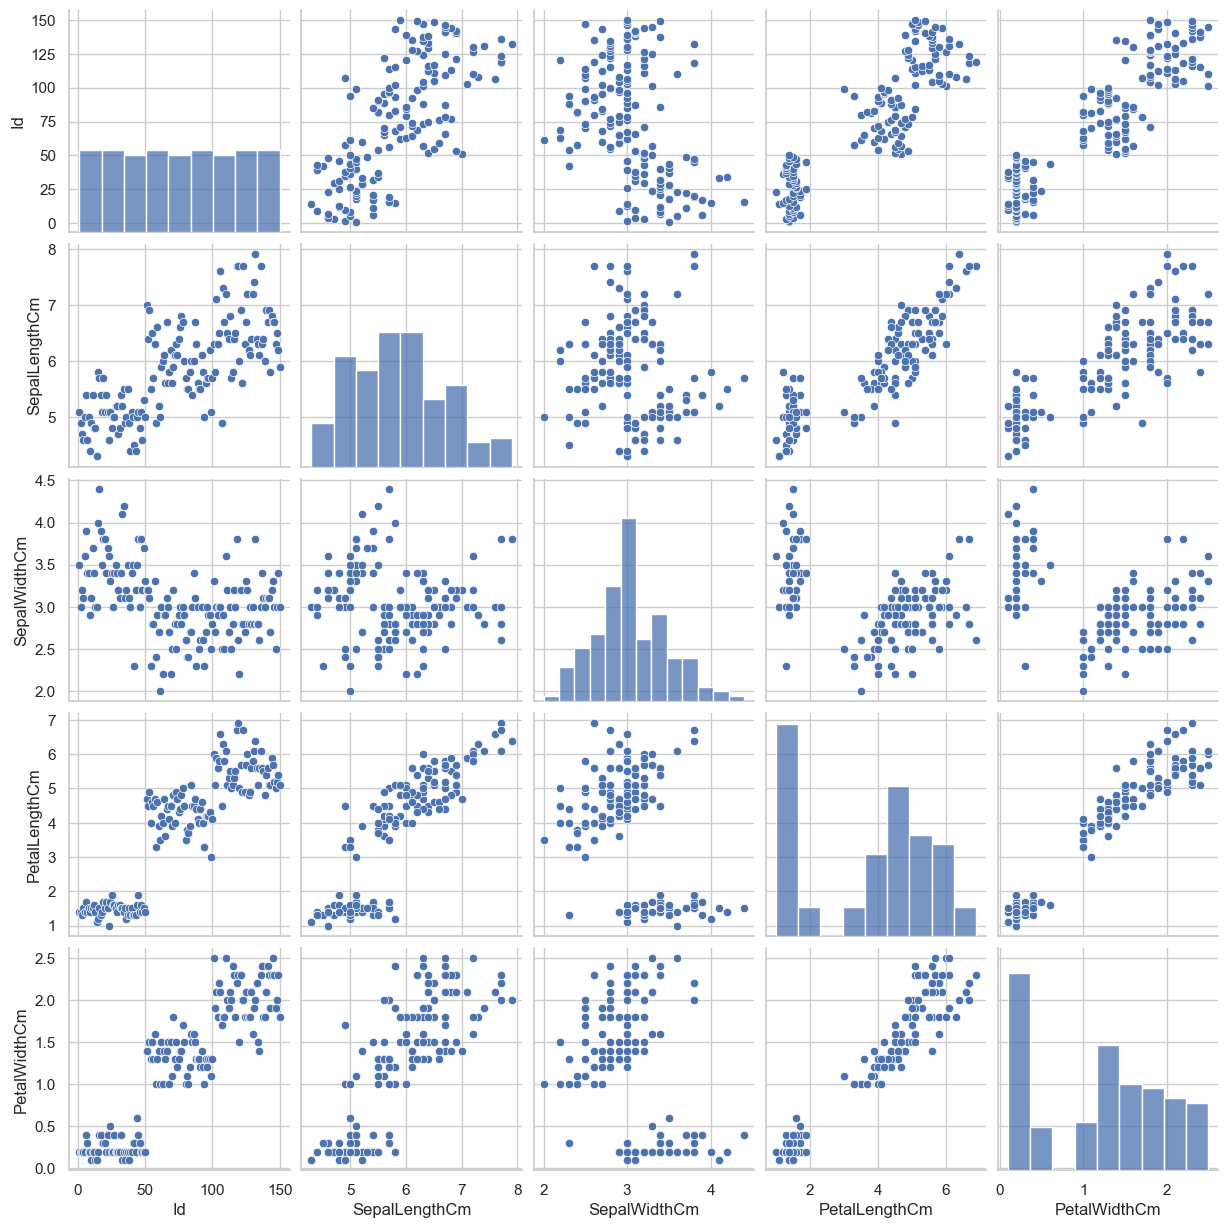

In [20]:
sns.pairplot(df)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


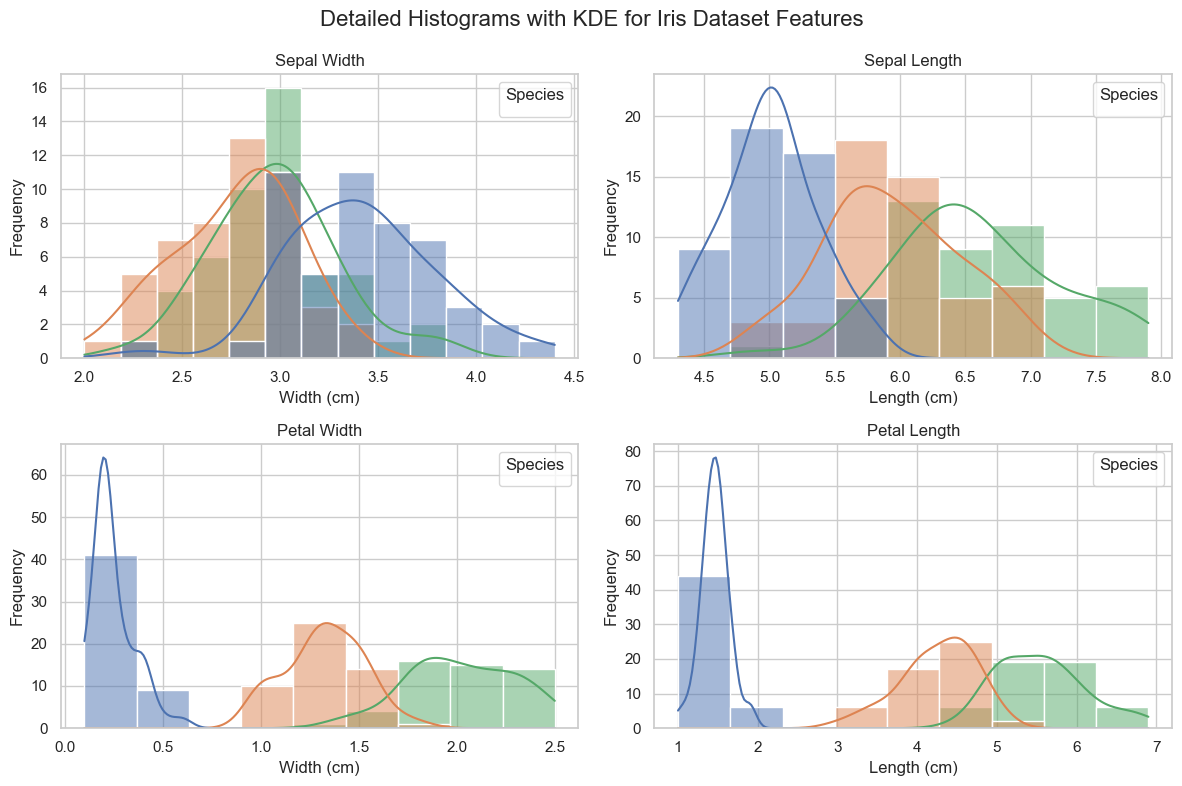

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Detailed Histograms with KDE for Iris Dataset Features", fontsize=16)

plot_settings = {
    "SepalWidthCm": {"title": "Sepal Width", "xlabel": "Width (cm)"},
    "SepalLengthCm": {"title": "Sepal Length", "xlabel": "Length (cm)"},
    "PetalWidthCm": {"title": "Petal Width", "xlabel": "Width (cm)"},
    "PetalLengthCm": {"title": "Petal Length", "xlabel": "Length (cm)"}
}

for i, feature in enumerate(plot_settings.keys()):
    row, col = divmod(i, 2)
    ax = axes[row, col]
    
    sns.histplot(data=df, x=feature, hue='Species', kde=True, ax=ax)
    
    ax.set_title(plot_settings[feature]["title"])
    ax.set_xlabel(plot_settings[feature]["xlabel"])
    ax.set_ylabel("Frequency")
    
    ax.legend(loc='upper right', title='Species')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

C:\Users\saswa\AppData\Local\Temp\ipykernel_2844\660786042.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<function matplotlib.pyplot.show(close=None, block=None)>

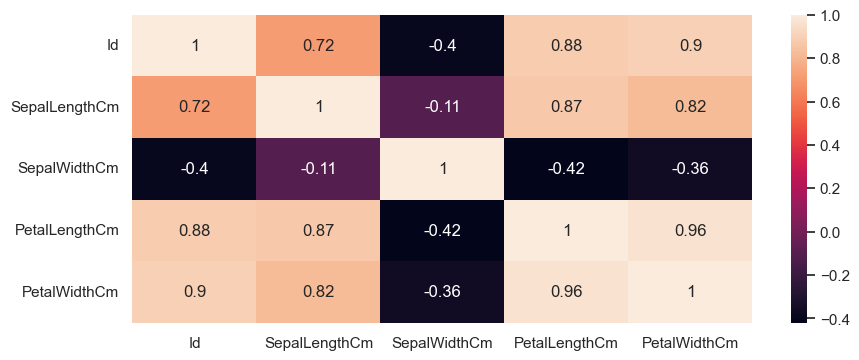

In [22]:
plt.figure(figsize=(10,4))
sns.heatmap(df.corr(),annot=True)
plt.show

In [23]:
X = df.drop(['Species',"SepalWidthCm"],axis=1)
y = df['Species']

In [24]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
RF = RandomForestClassifier(n_estimators=100, random_state=42)  
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
print(RF.score(X_train,y_train))
print(RF.score(X_test,y_test))

1.0
1.0


In [27]:
y_pred_rf=RF.predict(X_test)
y_pred_rf

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [28]:
df=pd.DataFrame({"y_pred_rf":y_pred_rf,"y_test":y_test})
df

,y_pred_rf,y_test
73,Iris-versicolor,Iris-versicolor
18,Iris-setosa,Iris-setosa
118,Iris-virginica,Iris-virginica
78,Iris-versicolor,Iris-versicolor
76,Iris-versicolor,Iris-versicolor
31,Iris-setosa,Iris-setosa
64,Iris-versicolor,Iris-versicolor
141,Iris-virginica,Iris-virginica
68,Iris-versicolor,Iris-versicolor
82,Iris-versicolor,Iris-versicolor


In [29]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_train

array([[-1.69110144, -1.01827123, -1.39489006, -1.35865217],
       [-1.03515906, -0.7730102 , -1.33696359, -1.49272181],
       [ 1.54175742, -0.03722712,  0.74838929,  0.92053173],
       [ 0.20644615,  0.20803391,  0.40083048,  0.51832281],
       [ 0.22987266,  1.06644751,  0.51668341,  0.38425317],
       [-1.40998328, -0.52774918, -1.45281653, -1.09051288],
       [-1.55054236, -0.52774918, -1.33696359, -1.35865217],
       [ 0.1127401 , -0.40511866, -0.06258127, -0.28609504],
       [ 1.3309188 ,  0.57592545,  0.74838929,  0.38425317],
       [ 1.42462485,  0.69855596,  0.98009517,  0.78646209],
       [-0.02781898,  0.94381699,  0.34290401,  0.25018353],
       [ 0.76868247,  1.67960008,  1.32765398,  1.72494958],
       [ 0.4641378 , -0.15985763,  0.22705107,  0.11611389],
       [ 0.67497642,  2.17012213,  1.61728632,  1.18867101],
       [-0.23865761, -0.28248815,  0.40083048,  0.38425317],
       [-1.78480749, -0.89564072, -1.39489006, -1.35865217],
       [ 1.07322715,  2.

In [30]:
type(X_train)
X_test=scaler.fit_transform(X_test)
X_test

array([[ 0.07772639,  0.25621067,  0.58987181,  0.05585913],
       [-1.15294139, -0.21299441, -1.03834577, -1.06789518],
       [ 1.08463638,  2.13303102,  1.78389803,  1.42933663],
       [ 0.18960527,  0.1389094 ,  0.48132397,  0.43044391],
       [ 0.14485372,  1.07731957,  0.64414573,  0.30558231],
       [-0.86205628, -0.56489823, -1.14689361, -0.94303359],
       [-0.12365561, -0.33029569, -0.00714131,  0.18072072],
       [ 1.59927927,  1.19462085,  0.80696748,  1.42933663],
       [-0.0341525 ,  0.37351194,  0.48132397,  0.43044391],
       [ 0.27910838, -0.09569314,  0.15568045,  0.05585913],
       [ 0.90563016,  0.72541576,  0.80696748,  1.05475186],
       [-1.28719605, -1.26870586, -1.20116753, -1.31761837],
       [-0.75017739, -0.44759696, -1.25544145, -1.19275678],
       [-1.35432339, -1.15140459, -1.14689361, -1.31761837],
       [-1.13056561, -0.91680205, -1.14689361, -1.06789518],
       [-0.30266183,  0.49081322,  0.58987181,  0.5553055 ],
       [ 0.77137549,  0.

In [31]:
from warnings import filterwarnings
filterwarnings('ignore')
print("The Accuracy : ",RF.score(X_test,y_test) * 100)

The Accuracy :  100.0


In [32]:
pre2 = RF.predict(X_test)
from warnings import filterwarnings
filterwarnings('ignore')

In [33]:
for i in range(len(pre2)):
    print("The given Data is:  ",X_test[i],"The predicted Output is:   ","-->>",pre2[i])

The given Data is:   [0.07772639 0.25621067 0.58987181 0.05585913] The predicted Output is:    -->> Iris-versicolor
The given Data is:   [-1.15294139 -0.21299441 -1.03834577 -1.06789518] The predicted Output is:    -->> Iris-setosa
The given Data is:   [1.08463638 2.13303102 1.78389803 1.42933663] The predicted Output is:    -->> Iris-virginica
The given Data is:   [0.18960527 0.1389094  0.48132397 0.43044391] The predicted Output is:    -->> Iris-versicolor
The given Data is:   [0.14485372 1.07731957 0.64414573 0.30558231] The predicted Output is:    -->> Iris-versicolor
The given Data is:   [-0.86205628 -0.56489823 -1.14689361 -0.94303359] The predicted Output is:    -->> Iris-setosa
The given Data is:   [-0.12365561 -0.33029569 -0.00714131  0.18072072] The predicted Output is:    -->> Iris-versicolor
The given Data is:   [1.59927927 1.19462085 0.80696748 1.42933663] The predicted Output is:    -->> Iris-virginica
The given Data is:   [-0.0341525   0.37351194  0.48132397  0.43044391]

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pre2))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38

